# Utilized Cars Price Prediction

## Phase 1: Data Preparation & Visualisation 

**Group Name:180**: 

Somesh Valse:(s3951107)----> [(50%)contribution]

Harshith Hullakere Siddegowda:(s3914263)----> [(50%)contribution]

## **Table of Content** 

1) Introduction 
    
    a) Data Source 
    
    b) Dataset Details
    
    c) Dataset Features
    
    d) Target Variable

2) Goals and Objective

3) Data Cleaning and Preprocessing

4) Data Exploration and Visualisation

5) Summary and Conclusion

6) References


## **Introduction** 

### **Data Source** 
The dataset for automobile prices utilised in the study was obtained from kaggle. This dataset contains automobile pricing from year 1939 until 2020.

### **Dataset Details**
With an increase in the number of automobiles with distinct capabilities and characteristics such as model, production year, category, brand, fuel type, engine volume, mileage, cylinders, colour, airbags, and many others. As we all want to purchase a car that is within our budget and has the greatest features available at that price.

This dataset has 17 features and 19237 observations in total.

### **Data Retrieval**

1) We load the modules we will utilise throughout this report after reading the dataset from the kaggle url.

2) This dataset will be shown in 5 randomly selected rows. 

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn 
import io
import requests 
pd.set_option('display.max_columns',None)


In [6]:
cars = pd.read_csv("train.csv")

In [7]:
# we are checking all features name 
cars.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [8]:
# Printing first five observations from our dataset 
cars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [9]:
from tabulate import tabulate
table = [['Name','Units','Description'],
         ['ID','NA','Unique Id of Cars'],
         ['Price','USD','Price of the car'],
         ['Levy','USD','The tax or other fees that are added to the price of the car'],
         ['Manufacture','NA','Brand name of car'],
         ['Model','NA','Model name of car'],
         ['Prod.year','NA','Production year of car'],
         ['Category','NA','Different segment in automobile sector for eg. SUV,sedan'],
         ['Leather interior','NA','farbic used for interior design of car'],
         ['Fuel Type','NA','type of gasoline used by car for powering the engine'],
         ['Engine Vol','cubic centimetres (cc)','The size of the cars engine in cubic centimeters (cc)'],
         ['Mileage','Km','The total distance that the car has traveled in kilometers'],
         ['Cylinder','unit','The number of cylinders in the cars engine'],
         ['Gear box type','NA','The type of transmission in the car (e.g., manual, automatic, etc.)'],
         ['Drive wheels','NA','The type of wheels that the car uses to drive (e.g., front-wheel drive, rear-wheel drive, all-wheel drive, etc.)'],
         ['Wheel','NA','The type of wheel or rim that the car has'],
         ['Color','NA','The color of the cars exterior'],
         ['Airbags','NA','The number of airbags that the car has for safety purposes']]


In [10]:
# features in our dataset is displayed in this table
print(tabulate(table, headers = 'firstrow', tablefmt = 'HTML'))

Name              Units                   Description
----------------  ----------------------  ----------------------------------------------------------------------------------------------------------------
ID                NA                      Unique Id of Cars
Price             USD                     Price of the car
Levy              USD                     The tax or other fees that are added to the price of the car
Manufacture       NA                      Brand name of car
Model             NA                      Model name of car
Prod.year         NA                      Production year of car
Category          NA                      Different segment in automobile sector for eg. SUV,sedan
Leather interior  NA                      farbic used for interior design of car
Fuel Type         NA                      type of gasoline used by car for powering the engine
Engine Vol        cubic centimetres (cc)  The size of the cars engine in cubic centimeters (cc)
Mileage      

### **Target Feature**

For this project, the target variable in this dataset will be the car price in US dollars. That is, we will forecast which automobile is the best for the given price using the explanatory/descriptive factors.

### **Goals and Objectives**

Main goal is to Assist the sellers, buyers, in the used car market. Based on the information provided by the users, it may then provide a relatively accurate price estimate. Understanding which features affect used vehicle prices. Create a model to forecast the price of a used car using the independent variables (features) that are available, and ignore variables that are not crucial for determining the price of a car. sellers, buyers will use the model to determine exactly how the prices change depending on the features of the car. so that they can make a better decision  while buying the car. The main objective of this project is to firstly, understand what are all the attribute feature effect on the price of a car. Secondly selecting the right features, which plays a significant role in predicting the price of a car,added to that, perform exploratory data analysis, which is the focus of this Phase 1 report, using basic descriptive statistics and data visualization charts to find patterns that are present in the data after data cleaning and preprocessing. to recognize and comprehend the connections. 




## **Data Cleaning and Preprocessing** 

This section describes the data cleaning and preparation processes for this project.

**Data Cleaning Steps**
 
 Checking datatypes and summary statistics for categorical and numerical     columns 

 Checking and rename/modify some cloumns names and 

 Remove all whitespace and lower case all columns 

 Checking for NaN values 

 Removing missing values 

 Checking for imbalance dataset 

 Dropping irrelevant columns from our dataset 

 Checking and rename/modify some cloumns names 

 Checking for the outliers 

In [11]:
# converting dataset into dataframe 
cars_df = pd.DataFrame(cars)
cars_df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [12]:
# We'll check shape of our dataframe 
cars_df.shape

(19237, 18)

In [13]:
# checking datatypes of each feature
cars_df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [14]:
# we'll drop irrelevant column
cars_df.drop('ID', axis=1, inplace=True)
cars_df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [15]:
cars_df = cars_df.reindex(columns=['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags','Price'])

In [16]:
# Checking summary statistics for categorical column
cars_df.describe(include=object)

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,17753,5033


In [17]:
# Checking for summary statistics for numerical columns 
cars_df.describe(include=['int64','float64'])

,Prod. year,Cylinders,Airbags,Price
count,19237.000000,19237.000000,19237.000000,1.923700e+04
mean,2010.912824,4.582991,6.582627,1.855593e+04
std,5.668673,1.199933,4.320168,1.905813e+05
min,1939.000000,1.000000,0.000000,1.000000e+00
25%,2009.000000,4.000000,4.000000,5.331000e+03
50%,2012.000000,4.000000,6.000000,1.317200e+04
75%,2015.000000,4.000000,12.000000,2.207500e+04
max,2020.000000,16.000000,16.000000,2.630750e+07


In [18]:
# removing 'km' from mileage column
cars_df['Mileage'] = cars_df['Mileage'].str.replace('km','').astype(float)

In [19]:
# renaming 'levy' to 'Tax' variable
cars_df = cars_df.rename(columns={'Levy':'tax'})

In [20]:
cars_df.columns

Index(['tax', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [21]:
cars_df = cars_df.drop(cars_df[cars_df['tax'] == '-'].index)
cars_df['tax'].unique()

array(['1399', '1018', '862', '446', '891', '761', '751', '394', '1053',
       '1055', '1079', '810', '2386', '1850', '531', '586', '1249',
       '2455', '583', '1537', '1288', '915', '1750', '707', '1077',
       '1486', '1091', '650', '382', '1436', '1194', '503', '1017',
       '1104', '639', '629', '919', '781', '530', '640', '765', '777',
       '779', '934', '769', '645', '1185', '1324', '830', '1187', '1111',
       '760', '642', '1604', '1095', '966', '473', '1138', '1811', '988',
       '917', '1156', '687', '11714', '836', '1347', '2866', '1646',
       '259', '609', '697', '585', '475', '690', '308', '1823', '1361',
       '1273', '924', '584', '2078', '831', '1172', '893', '1872', '1885',
       '1266', '447', '2148', '1730', '730', '289', '502', '333', '1325',
       '247', '879', '1342', '1327', '1598', '1514', '1058', '738',
       '1935', '481', '1522', '1282', '456', '880', '900', '798', '1277',
       '442', '1051', '790', '1292', '1047', '528', '1211', '1493',
    

In [63]:
# changing dtype of tax colunm 
cars_df['tax'] = cars_df['tax'].astype(float)

As we can see from above feature name levy is not categorical variable, we have to convert dtype of levy feature into numerical variable. we are also making all features and observations in lower casr so that it will be easy for futher analysis. 

In [64]:
# Remove all whitespaces and make all columns name lower case from our dataset 
# remove whitespaces from rows by using repalce function 
cars_df = cars_df.replace('\s+', '', regex=True)
# making columns name lower case 
cars_df.columns = cars_df.columns.str.lower()
# making all categorical columns in lower case
cate_col = [feature for feature in cars_df.columns if cars_df[feature].dtypes == object]
cars_df[cate_col] = cars_df[cate_col].apply(lambda i:i.str.lower())

In [65]:
cars_df.dtypes

tax                 float64
manufacturer         object
model                object
prod. year            int64
category             object
leather interior     object
fuel type            object
engine volume        object
mileage             float64
cylinders           float64
gear box type        object
drive wheels         object
wheel                object
color                object
airbags               int64
price               float64
dtype: object

In [71]:
cars_df

,tax,manufacturer,model,prod. year,category,leather interior,fuel type,engine volume,mileage,cylinders,gear box type,drive wheels,wheel,color,airbags,price
0,1399.0,lexus,rx450,2010,jeep,yes,hybrid,3.5,186005.0,6.0,automatic,4x4,leftwheel,silver,12,NaN
1,1018.0,chevrolet,equinox,2011,jeep,no,petrol,3,192000.0,6.0,tiptronic,4x4,leftwheel,black,8,NaN
3,862.0,ford,escape,2011,jeep,yes,hybrid,2.5,168966.0,4.0,automatic,4x4,leftwheel,white,0,NaN
4,446.0,honda,fit,2014,hatchback,yes,petrol,1.3,91901.0,4.0,automatic,front,leftwheel,silver,4,NaN
5,891.0,hyundai,santafe,2016,jeep,yes,diesel,2,160931.0,4.0,automatic,front,leftwheel,white,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1055.0,mercedes-benz,e350,2013,sedan,yes,diesel,3.5,107800.0,6.0,automatic,rear,leftwheel,grey,12,NaN
19233,831.0,hyundai,sonata,2011,sedan,yes,petrol,2.4,161600.0,4.0,tiptronic,front,leftwheel,red,8,NaN
19234,836.0,hyundai,tucson,2010,jeep,yes,diesel,2,116365.0,4.0,automatic,front,leftwheel,grey,4,NaN
19235,1288.0,chevrolet,captiva,2007,jeep,yes,diesel,2,51258.0,4.0,automatic,front,leftwheel,black,4,NaN


In [72]:
cars_df['price'].unique()

array([nan])

In [73]:
median_price=cars_df['price'].median
upper_threshold = 1.5 * cars_df['price'].quantile(0.75)
lower_threshold = 1.5 * cars_df['price'].quantile(0.25)
print(upper_threshold)
#cars_df.loc[cars_df['price'] > upper_threshold, 'price'] = median_price


nan


In [74]:
# lets capture all missing values 
# First handle categorical variable with missing values 
features_nan = [feature for feature in cars_df.columns if cars_df[feature].isnull().sum()==0 and cars_df[feature].dtypes == object]
for feature in features_nan:
  print('{},{} % of missing values'.format(feature,np.round(cars_df[feature].isnull().mean(), 4)))

manufacturer,0.0 % of missing values
model,0.0 % of missing values
category,0.0 % of missing values
leather interior,0.0 % of missing values
fuel type,0.0 % of missing values
engine volume,0.0 % of missing values
gear box type,0.0 % of missing values
drive wheels,0.0 % of missing values
wheel,0.0 % of missing values
color,0.0 % of missing values


In [75]:
# Now we will handle numeric variables with missing values
features_nan = [feature for feature in cars_df.columns if cars_df[feature].isnull().sum()==0 and cars_df[feature].dtypes != object]
for feature in features_nan:
  print('{},{} % of missing values'.format(feature,np.round(cars_df[feature].isnull().mean(), 4)))

tax,0.0 % of missing values
prod. year,0.0 % of missing values
mileage,0.0 % of missing values
cylinders,0.0 % of missing values
airbags,0.0 % of missing values


In [95]:
# we'll check for uniques values for each features in our dataframe 
#cat_col = [feature for feature in cars_df.columns if cars_df[feature].dtypes == object]
#print(cat_col)
for i in cate_col:
    print(f"unique value for each feature '{i}':{cars_df[i].unique()}")
#cars_df.unique()

unique value for each feature 'manufacturer':['lexus' 'chevrolet' 'ford' 'honda' 'hyundai' 'toyota' 'mercedes-benz'
 'porsche' 'volkswagen' 'audi' 'nissan' 'bmw' 'subaru' 'daewoo'
 'ssangyong' 'mazda' 'gmc' 'kia' 'infiniti' 'fiat' 'opel' 'mitsubishi'
 'acura' 'citroen' 'renault' 'jeep' 'dodge' 'mini' 'chrysler' 'jaguar'
 'daihatsu' 'buick' 'landrover' 'tesla' 'cadillac' 'suzuki' 'lincoln'
 'bentley' 'mercury' 'volvo' 'vaz' 'maserati' 'ferrari' 'skoda'
 'lamborghini' 'peugeot' 'gaz' 'scion' 'hummer']
unique value for each feature 'model':['rx450' 'equinox' 'escape' 'fit' 'santafe' 'prius' 'sonata' 'camry'
 'e350' 'chr' 'elantra' 'rx400' 'gx470' 'highlander' 'vito' 'cayenne'
 'chrlimited' 'h1' 'jetta' 'tacoma' 'priusc' 'civic' 'q7' 'e300' 'q5'
 'juke' '535' 'cruzelt' 'fusion' 'tucson' 'captiva' 'ml350' 'yaris'
 'cruze' 'orlando' 'gl63amg' 'forester' 'lacetti' 'genesis' '911' 'gx460'
 'focusse' 'x5' 'explorer' 'e500amg' 'korando' '616' 'maxima' 'volt'
 'terrain' 'hr-vex' 'elantrasportlimi

We can see from above, levy and manufacture feature has some irrelevant observation like "-", "სხვა" respectively. so we can drop these observation. 

In [96]:
# Dropping irrelevant observations from levy and manufacturing features 
cars_df = cars_df.drop(cars_df[cars_df['manufacturer'] == 'სხვა'].index)
cars_df['manufacturer'].unique()

array(['lexus', 'chevrolet', 'ford', 'honda', 'hyundai', 'toyota',
       'mercedes-benz', 'porsche', 'volkswagen', 'audi', 'nissan', 'bmw',
       'subaru', 'daewoo', 'ssangyong', 'mazda', 'gmc', 'kia', 'infiniti',
       'fiat', 'opel', 'mitsubishi', 'acura', 'citroen', 'renault',
       'jeep', 'dodge', 'mini', 'chrysler', 'jaguar', 'daihatsu', 'buick',
       'landrover', 'tesla', 'cadillac', 'suzuki', 'lincoln', 'bentley',
       'mercury', 'volvo', 'vaz', 'maserati', 'ferrari', 'skoda',
       'lamborghini', 'peugeot', 'gaz', 'scion', 'hummer'], dtype=object)

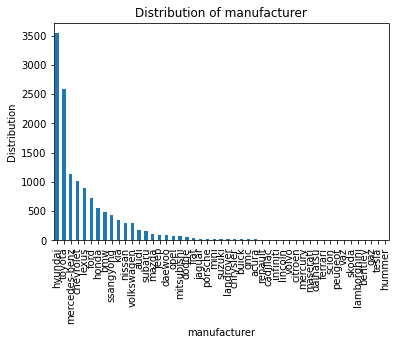

<Figure size 1440x576 with 0 Axes>

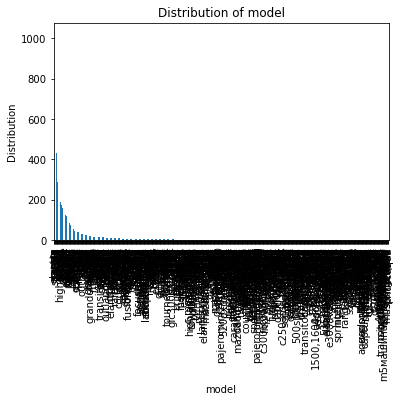

<Figure size 1440x576 with 0 Axes>

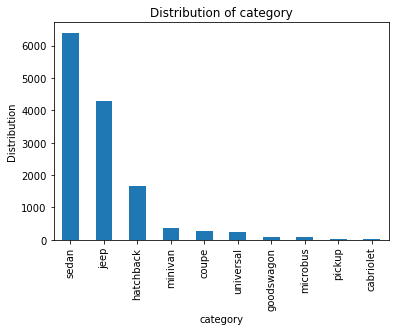

<Figure size 1440x576 with 0 Axes>

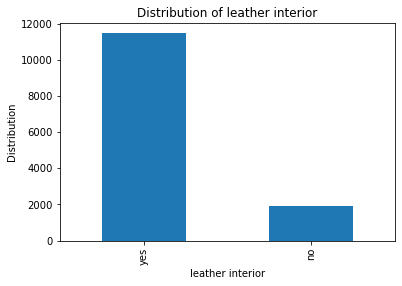

<Figure size 1440x576 with 0 Axes>

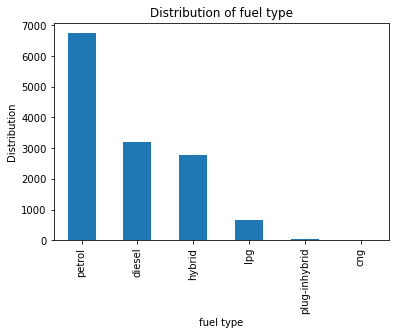

<Figure size 1440x576 with 0 Axes>

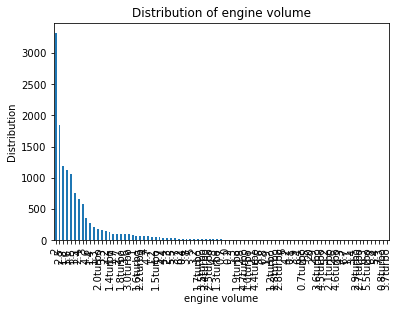

<Figure size 1440x576 with 0 Axes>

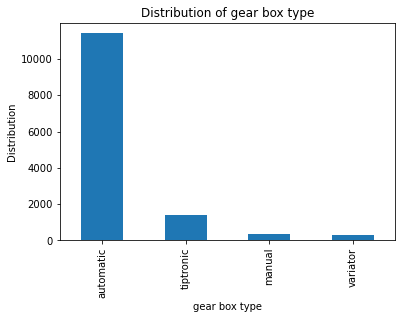

<Figure size 1440x576 with 0 Axes>

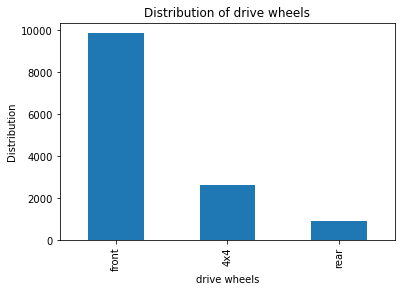

<Figure size 1440x576 with 0 Axes>

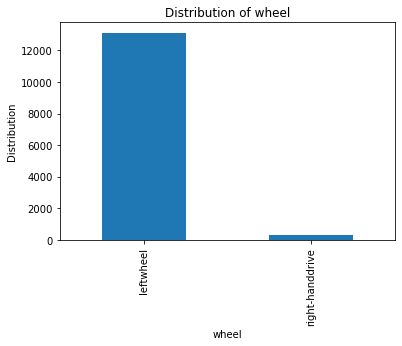

<Figure size 1440x576 with 0 Axes>

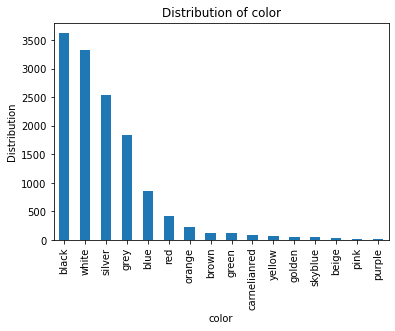

<Figure size 1440x576 with 0 Axes>

In [97]:
# Checking for imbalance dataset in categorical variables 
for i in cate_col:
  cat_col_count = cars_df[i].value_counts()
  cat_col_count.plot(kind='bar')
  plt.title("Distribution of {}".format(i))
  plt.xlabel(i)
  plt.ylabel("Distribution")
  plt.figure(figsize = (20,8))
  plt.show()

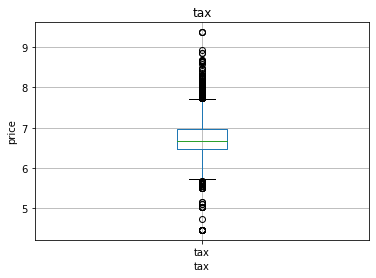

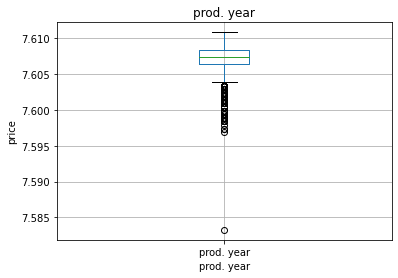

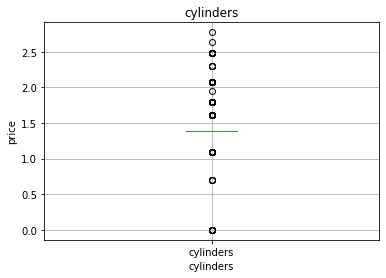

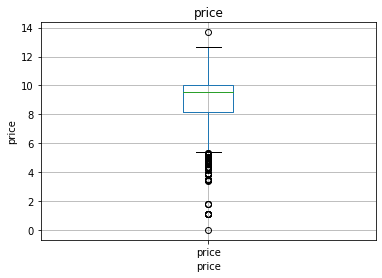

In [98]:
# Checking for the outliers for numeric variables 
num_col = [feature for feature in cars_df.columns if cars_df[feature].dtypes != object]
for feature in num_col:
  if 0 in cars_df[feature].unique():
    pass
  else:
    cars_df[feature] = np.log(cars_df[feature])
    cars_df.boxplot(column = feature)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("price")
    plt.show()

As we can see, there are outliers in our dataset, which is very important to handle whenever we are going for model building, cause it can less accuracy in our predictions. There are various method we can handle outliers in our dataset, such as logarithm transformations or else we can remove the outliers by using quantile method. 

<AxesSubplot:>

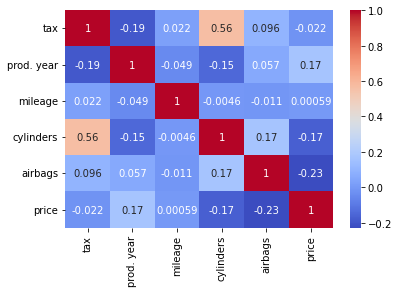

In [99]:
# Checking correlation between target variable and numeric varibales 
corr_matrix = cars_df.corr(method='pearson')
corr_matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

As we can see from the above correlation matrix, there are more than one relationships between variables. A positive link 
exists between the price and the production year of the automobile, indicating that the manufacturing year of the car is 
important when purchasing a car. Furthermore, we can detect a positive association between tax, cyliders, and airbags; 
it is obvious that if automobile  has more features and a larger engine, it will always be taxed more.

## **Data Exploration and Visualisation** 


In [100]:
cars_df.columns

Index(['tax', 'manufacturer', 'model', 'prod. year', 'category',
       'leather interior', 'fuel type', 'engine volume', 'mileage',
       'cylinders', 'gear box type', 'drive wheels', 'wheel', 'color',
       'airbags', 'price'],
      dtype='object')

### **Univariate Visualisation**

In the below figure we can see the petrol cars has the highest number of sales compared to all other fuel type. followed by diesel and hybrid.

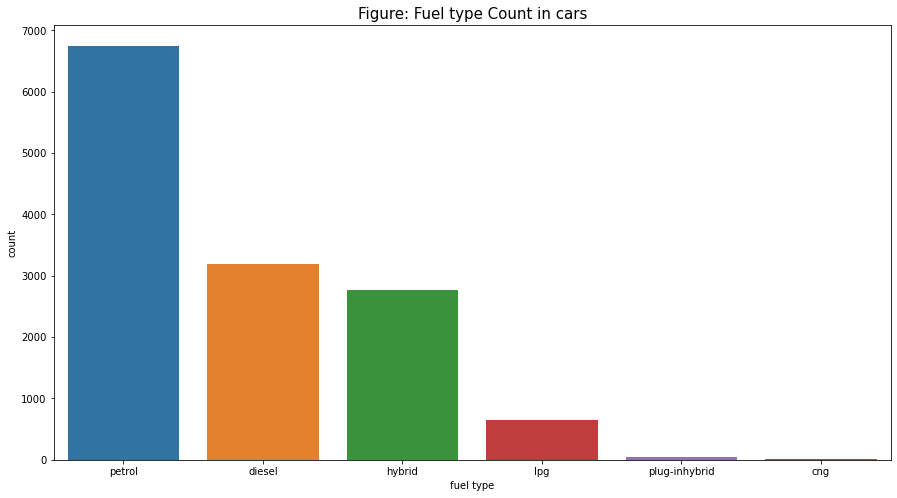

In [101]:
plt.figure(figsize = (15,8))
fig = sns.countplot(x = 'fuel type', data = cars_df, palette = None, 
                    order = cars_df['fuel type'].value_counts().index)
fig = plt.title('Figure: Fuel type Count in cars', fontsize = 15)
plt.show()

In the figure below we are plotting the box plot for price variable, after visualizing the graph its clear it needs log transformation due to a fact that that the distribution of price in left skewed.

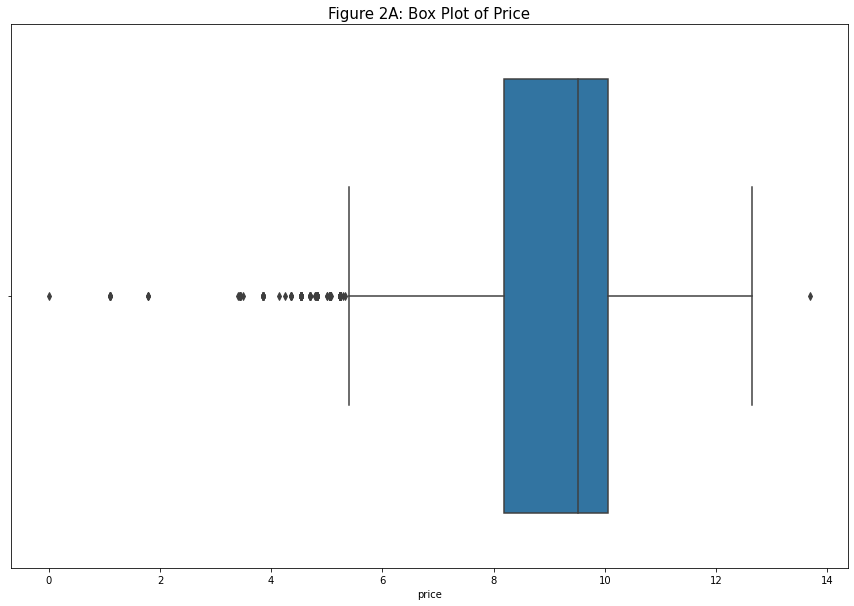

In [102]:
# Boxplot of Price
plt.figure(figsize = (15,10))
sns.boxplot(cars_df['price']).set_title('Figure 2A: Box Plot of Price', fontsize = 15)
plt.show();

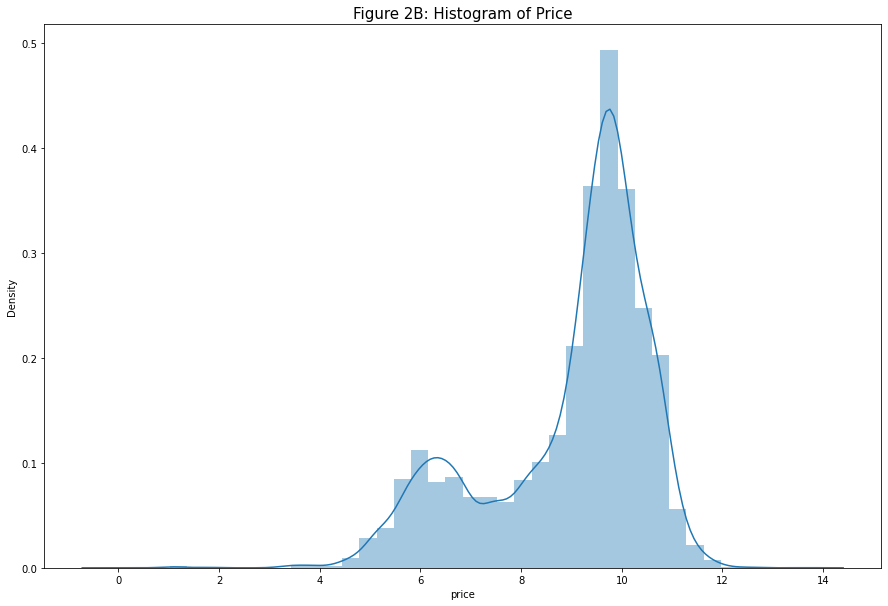

In [103]:
# Histogram of Price 
plt.figure(figsize = (15,10))
sns.distplot(cars_df['price'], kde=True, bins=40).set_title('Figure 2B: Histogram of Price', fontsize = 15)
plt.show();


In the figure below we are plotting the bar plot for category variable, after visualizing the graph its clear most of the buyers 
prefer sedan cars followed jeep and hatchback cars. 

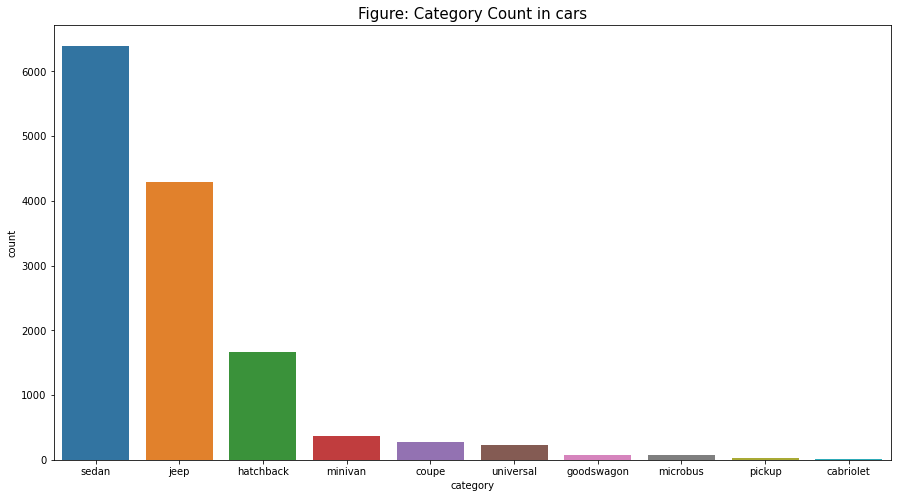

In [104]:
# Barplot of Manufacturer
plt.figure(figsize = (15,8))
fig = sns.countplot(x = 'category', data = cars_df, palette = None, 
                    order = cars_df['category'].value_counts().index)
fig.set_title('Figure: Category Count in cars', fontsize = 15)
plt.show()

### **Two-Variable Visualisation**


 In the below figure its clear, as the price of the car tends to increase the tax rate increases. there is a correlation between tax and the price of cars.

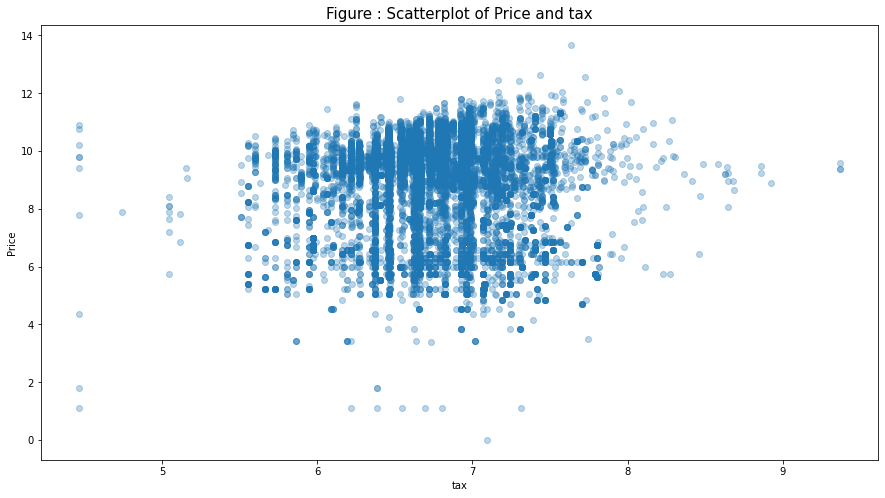

In [105]:
# scatterplot between price and tax varibales 
plt.figure(figsize = (15,8))
plt.scatter(cars_df['tax'], cars_df['price'], alpha = 0.3)
plt.title('Figure : Scatterplot of Price and tax', fontsize = 15)
plt.xlabel('tax')
plt.ylabel('Price')
plt.show();

 In the below figure we can see the price of the car vary depends on the category of the cars. for example the categories for cars like jeep, sedan and taxi based services have a higher price compared to other types of cars.

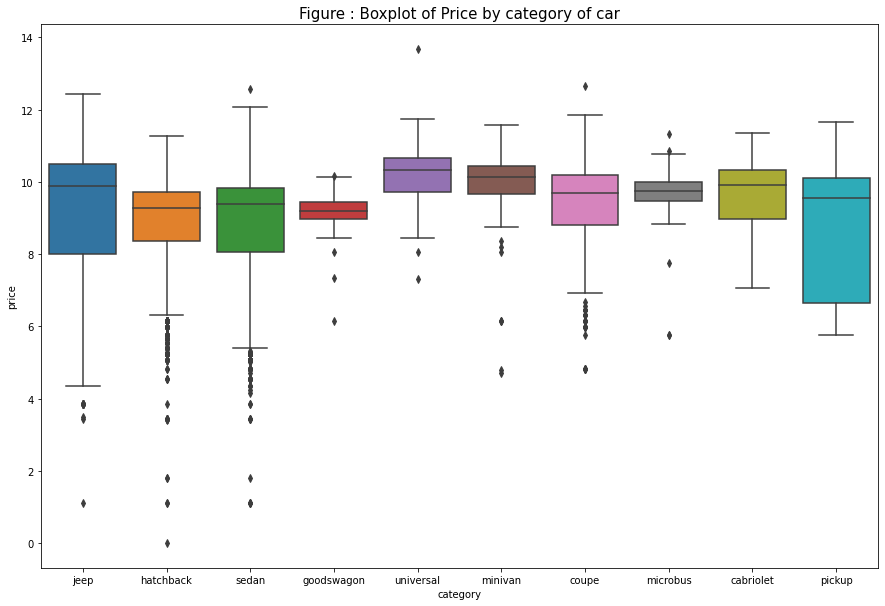

In [106]:
# boxplot between price and category type of the car 
plt.figure(figsize = (15,10))
sns.boxplot(cars_df['category'], cars_df['price']);
plt.title('Figure : Boxplot of Price by category of car', fontsize = 15)
plt.show();

According to the data, buyers prefer black colour for their vehicles, followed by grey and silver, 
since as we can see, the most popular automobile category is sedan, and most sedan cars are either 
silver, black, or white in colour.

Text(0, 0.5, 'color')

<Figure size 1080x720 with 0 Axes>

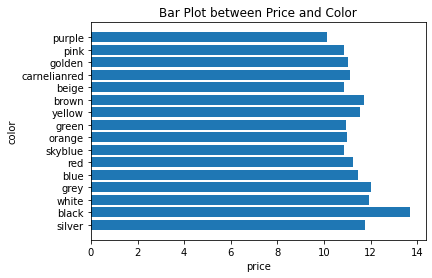

In [107]:
# barplot between color and price
plt.figure(figsize = (15,10))
fig,ax = plt.subplots()
ax.barh(cars_df['color'],cars_df['price'])
ax.set_title("Bar Plot between Price and Color")
ax.set_xlabel("price")
ax.set_ylabel("color")

### **Three-Variable Visualisation**

According to the graph below, the majority of consumers prefer sedan, hatchback, and Jeep category automobiles, and we can see that there is some relationship between price and tax factors, as the price of the car grows, so does the tax rate associated with that car.

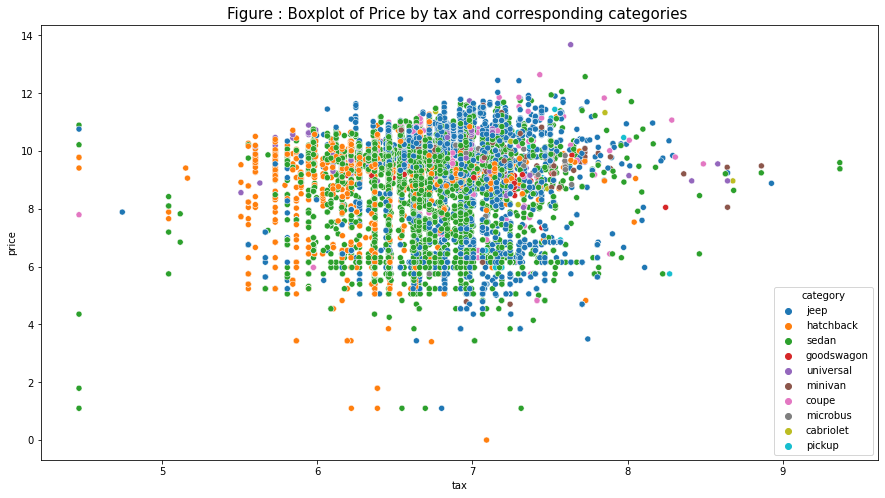

In [108]:
plt.figure(figsize = (15,8))
sns.scatterplot(cars_df['tax'], cars_df['price'], 
            hue = cars_df['category'])
plt.title('Figure : Boxplot of Price by tax and corresponding categories ', fontsize = 15)
plt.show();

The graph below clearly shows that consumers prefer hybrid technology to traditional gasoline technology, 
perhaps related to technological advancements and environmental concerns.

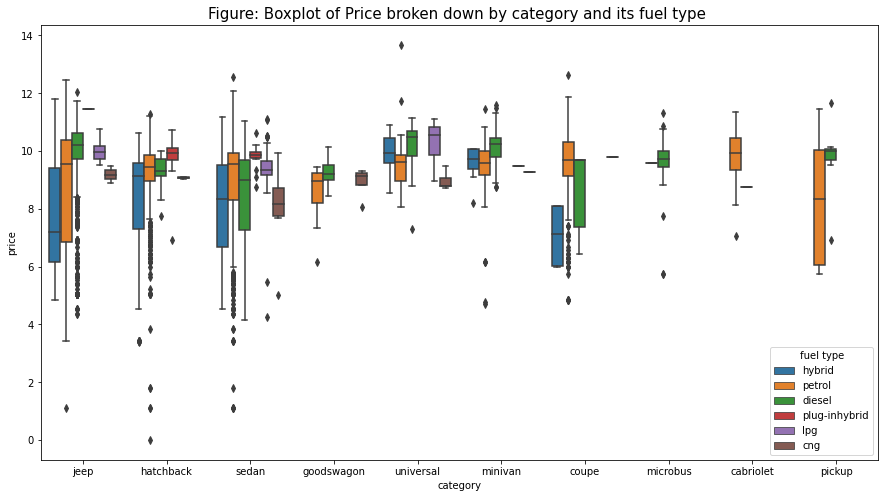

In [109]:
plt.figure(figsize = (15,8))
sns.boxplot(cars_df['category'], cars_df['price'], 
            hue = cars_df['fuel type'])
plt.title('Figure: Boxplot of Price broken down by category and its fuel type ', fontsize = 15)
plt.show();

On the graph below, we can plainly see that most buyers choose tiptronic transmissions above other gear box types, followed by manual and automatic transmissions.

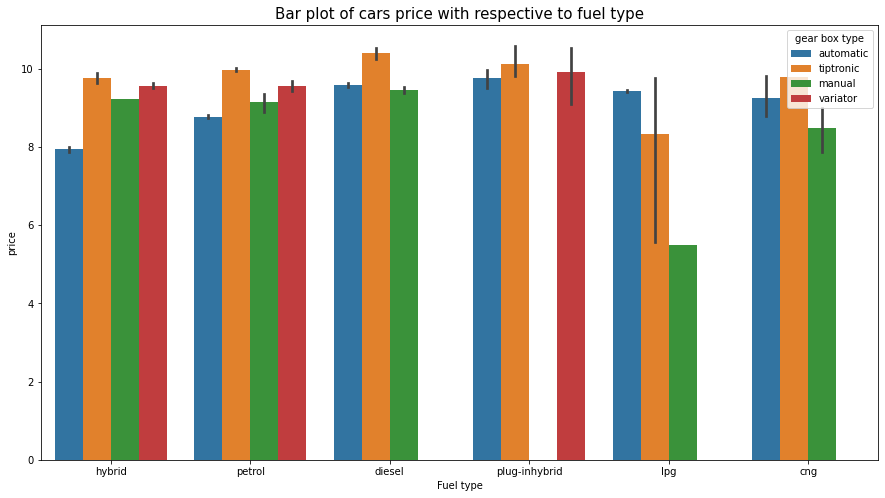

In [110]:
plt.figure(figsize = (15,8))
sns.barplot(x='fuel type', y='price', hue = 'gear box type', data=cars_df)
plt.title("Bar plot of cars price with respective to fuel type", fontsize=15)
plt.xlabel("Fuel type")
plt.ylabel("price")
plt.show()

##  Summary & Conclusion

Predicting automotive expenses accurately is critical for both buyers and sellers, and multiple studies have been undertaken on this topic using various data science and machine learning approaches. Our goal in this project is to explore and develop a viable model for forecasting automobile prices so that customers may make informed purchasing decisions. 

We deployed several data cleaning, preprocessing, and data visualisation techniques in Phase 1 of this project. Secondly, we chose to remove extraneous columns, namely ID variables. So we chose to partition our dataset into two categories of variables: category and numerical variables, and then conduct our analysis. We also evaluated our dataset for missing data, outliers, and imbalance, and we opted to eliminate any rows with such data quality concerns. Because the data appeared to be quite clean to begin with, cleaning was minimal. Moreover, we used a correlations matrix to better assess the strength of the association between distinct factors.

We created numerous visualisations to analyse the data using the explanatory factors. It was apparent that the majority of people like to buy sedan vehicles, followed by jeep and hatchback cars in black, silver, and white, and that the prefered fuel type is petrol, followed by diesel and hybrid.

We also noticed that several of the numerical statistics, such as the goal variables and pricing, are skewed. To overcome this issue, data scaling/transformation will be required. We've seen that tax, fuel type, colour, and category type all play important roles in determining automobile prices. However, further investigation is required to find any further links.

 ## Literature Review 

**Introduction**:

This writing survey points to supply an outline of the current state of information on utilized car cost expectation.By precisely foreseeing the cost of a utilized car, buyers can make educated acquiring choices, whereas venders can optimize their estimating procedures.This paper points to construct a model to predict used cars' sensible costs based on numerous viewpoints, counting vehicle mileage, year of manufacturing, fuel utilization, transmission, fuel sort, and engine size.Utilized car cost forecast is an significant area of research because it has critical suggestions for both buyers and dealers of utilized cars.
    
**Previous Journal articles**:

1) "Predicting analysis of used car prices using machine learning" by Ashutosh Sharma, Sahil Mittal. This paper used various machine learning models like decision tree, regression and Support Vector Machine models on important features like number of years car has been utilize, production_year, mileage, cyliders. 

2) "Used cars Price Prediction and Valuation using Data Mining Techniques" byAbdulla AlShared. In this research paper author main objective was to estimate prices of cars using attributes that are more correlated with a target variables(Price), models used for this predictions are Random Forest Regressor, Linear Regression and Bagging Regression. 

3) "Car Price Prediction Using Machine Learning Algorithms" by Bhumireddy Venkata and Raghurami Reddy. This papers focuses on buliding statistical model to predict resale cost of the used cars using various machine learning models like linear regression, K-Nearest Neighbour(KNN), random forest regressor, bagging regressor, adaboost regressor and XGBoost. 

4) "Car Price Prediction using Machine Learning" by T.Veda Reddy, Y.Praneeth.This papers mainly focuses on developing efficient and effective model which will be able to predict the price of a used car by implementing gradient boosting technology for good accuracy. 

5) "Used Car Price Predicition Based on the Iterative Framework of XGBoost and LightGBM" by Baoyang cui and Lei Meng. This paper used itrative framework of XGBoost and LightGBM techniques to enhance the low predicting accuracy of machine learning and deep learning models. so that we can achive more accurate predictions for the given problems. 

6) "Used Car Prediction" by Rajath Kala and V.Nagesh. This work focuses on building ML solutions for identifying the precise automobile pricing at the present time, such that it can be used by both customers looking to acquire a car and sellers looking to sell a car on that day. Models such as Linear Regression, Ridge Regression, Lasso Regression, Elastic Net, and Decision Tree were employed.

7) "Car Price Prediction using Machine Learning Techniques" by Enis Gegic and Dino Keco. This work focuses on comparison of machine learning methods for estimating the pricing of secondhand cars by using KNN, XG-Boost, SVM and Regressions models.

8) "Prediction Using Machine Learning in the IoT Smart Manufacturing Era" by AL-Turjman and Fadi. In this research, the authors employed a variety of methodologies to address a problem with automobile pricing projections, and then used IoT technology to provide a long-term solution.

9) "Forecasting resale value of the car: Evaluating the proficiency under the impact of machine learning model" by Arora Preeti and Singh Ajit. The approach of calculating the pricing of an old automobile is known as automotive resale value prediction. Secondhand automobiles are in high demand, but the mechanism for determining their worth is incorrect, which may cause them to be overpriced. Models such as XGBoost, SVM and Random Forest regressor were used for predicting car prices. 

10) "Price Prediction and Classification of Used-Vehicles Using Supervised Machine Learning" by Bukvić and Lucija. This effort focuses on developing ML solutions for determining current automotive price, such that it can be utilised by both buyers trying to buy a car and sellers looking to sell a car on that day. Linear Regression, Ridge Regression, Lasso Regression, Elastic Net, and Decision Tree models were used.

    
  

**Conference papers**:

11)."Prediction Model for Used Car Price Estimation Based on Neural Network"a few dispersion bends of remaining esteem of the utilized cars were analyzed in time space. At that point, the BP neural network was set up and utilized to extricate the highlight of the conveyance bends in different conditions. A set of plotted information was utilized to prepare the NN and come to the preparing objective. At long last, the conspired information as inputs and the  yields were organized for nonlinear bend fit. Conclusion was drawn that the recently proposed show is doable and exact for leftover esteem forecast of the utilized cars with different conditions.

12)"The paper by Yufei Chen1,,Chenle Li2,, Minglu Xu discuss and uses multiple linear regression, decision tree and random forest to build up the automobile price forecasting model".they utilize implies to cluster cars and discover out that a few variables like control, kilometers, gearbox have an impact on the cost. Agreeing to the examination,  discover out that irregular woodland has the leading expectation execution, make beyond any doubt R2 comes to 0.92 will be sufficient.


**Conclusion**:

The writing on utilized car cost expectation highlights the significance of considering different variables like counting vehicle mileage, year of manufacturing, fuel utilization, transmission, fuel sort, and engine size when anticipating the cost of a utilized car.supervised Machine learning, regression analysis, Decision tree model and deep learning approaches have appeared guarantee in precisely foreseeing utilized car costs, but assist inquire about is required to completely get it the potential and restrictions of these approaches.at long last The  results of these studies can offer assistance both buyers and venders of utilized cars make more informed decisions about pricing.

**Reference**: 

1) Datt Sharma, A., Sharma, V., Mittal, S., Jain, G., & Narang, S. (n.d.). PREDICTIVE ANALYSIS OF USED CAR PRICES USING MACHINE LEARNING. In International Research Journal of Modernization in Engineering Technology and Science (pp. 2582–5208). https://www.irjmets.com/uploadedfiles/paper/volume3/issue_6_june_2021/12071/1628083486.pdf 

2) Alshared, A. (2019). Used Cars Price Prediction and Valuation using Data Mining Used Cars Price Prediction and Valuation using Data Mining Techniques Techniques. https://scholarworks.rit.edu/cgi/viewcontent.cgi?article=12220&context=theses. 

3) Abhijeet, S., Sathaye, S SIJRASET. (2019). Car Price Prediction Using Machine Learning Algorithms. Www.ijraset.com. https://www.ijraset.com/research-paper/car-price-prediction-using-machine-learning-algorithms

4) Reddy, V., Praneeth, Y., Kiran, Y., & Pavan, G. (2022). Issue 4 www.jetir.org (ISSN-2349-5162). JETIR2204621 Journal of Emerging Technologies and Innovative Research, 9. https://www.jetir.org/papers/JETIR2204621.pdf

5) Cui, B., Ye, Z., Zhao, H., Renqing, Z., Meng, L., & Yang, Y. (2022). Used Car Price Prediction Based on the Iterative Framework of XGBoost+LightGBM. Electronics, 11(18), 2932. https://doi.org/10.3390/electronics11182932

6) USED CAR PRICE PREDICTION. (2023). Retrieved April 9, 2023, from https://jespublication.com/upload/2022-V13I6051.pdf

7) Gegic, E., Isakovic, B., Keco, D., Masetic, Z., & Kevric, J. (2019). Car Price Prediction using Machine Learning Techniques. TEM Journal, 8(1), 113–118. https://doi.org/10.18421/TEM81-16

8) Al-Turjman, F., Hussain, A. A., Alturjman, S., & Altrjman, C. (2022). Vehicle Price Classification and Prediction Using Machine Learning in the IoT Smart Manufacturing Era. Sustainability, 14(15), 9147. https://doi.org/10.3390/su14159147

9) Arora, P., & Singh, A. (2021). Forecasting resale value of the car: Evaluating the proficiency under the impact of machine learning model. International Journal of Intelligent Transportation Systems Research, 19(4), 193-202. doi: 10.1007/s13177-021-00294-4.

10) Bukvić, L., Pašagić Škrinjar, J., Fratrović, T., & Abramović, B. (2022). Price Prediction and Classification of Used-Vehicles Using Supervised Machine Learning. Sustainability, 14(24), 17034. https://doi.org/10.3390/su142417034

11)Shen Gongqi, Wang Yansong, & Zhu Qiang. (2011). New Model for Residual Value Prediction of the Used Car Based on BP Neural Network and Nonlinear Curve Fit. 2011 Third International Conference on Measuring Technology and Mechatronics Automation. https://doi.org/10.1109/icmtma.2011.455

12)Chen, Y., Li, C., & Xu, M. (2021, December 15). Business Analytics for Used Car Price Prediction with Statistical Models. Www.atlantis-Press.com; Atlantis Press. https://doi.org/10.2991/assehr.k.211209.090
